#**Quadratic Programming**

Concider the following QP problem
\begin{equation}
\begin{aligned}
\min_{x_1,x_2} \quad & x_1^2 + 2x_2^2 -x_1 -2x_2\\
\textrm{s.t.} \quad & x_1+x_2 = 3\\
& x_1 \geq 1\\
& x_2 \leq 3\\
& -x_1 +3x_2 \geq -1\\
& x_1+x_2 \leq 5
\end{aligned}
\end{equation}

Find the solution to this problem and plot the feasible region and contour plot(*) of the objective function.

> Solution

We need to rewrite the quadratic equation in the proper QP form:
\begin{equation}
\begin{aligned}
\min_{x} \quad & \frac{1}{2}x^{T}Px + q^Tx \\
\textrm{s.t.} \quad & Gx \leq h\\
& Ax =b
\end{aligned}
\end{equation}
where
\begin{equation}
\begin{aligned}
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \quad
P = \begin{bmatrix} p_{11} & p_{12} \\ p_{21} & p_{22} \end{bmatrix} \quad
q^T = \begin{bmatrix} q_1 & q_2 \end{bmatrix}
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
P = \begin{bmatrix} 2 & 0 \\ 0 & 4 \end{bmatrix} \\
q^T =
\begin{bmatrix} -1 & -2 \end{bmatrix}
\end{aligned}
\end{equation}

The constraint matrices:

\begin{equation}
\begin{aligned}
A =
\begin{bmatrix} 1 & 1 \end{bmatrix} \\
b=\begin{bmatrix} 3 \end{bmatrix}
\end{aligned}
\end{equation}
To find matrix $G$ and $h$ first we need to multiply some inequalities by $-1$:
\begin{equation}
\begin{aligned}
& -x_1 \leq -1\\
& x_2 \leq 3\\
& x_1 - 3x_2 \leq 1\\
& x_1+x_2 \leq 5
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
G =
\begin{bmatrix} -1 & 0 \\ 0 & 1\\ 1& -3\\1 & 1 \end{bmatrix} \\
h=\begin{bmatrix} -1\\3\\1\\5 \end{bmatrix}
\end{aligned}
\end{equation}

**Code and output**

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

size_x = 2

P = np.array([[2, 0], [0, 4]])
q = np.array([[-1],[-2]])
G = np.array([[-1, 0],[0, 1],[1,-3],[1, 1]])
h = np.array([[-1],[3],[1],[5]]).reshape(4,)
A = np.array([[1, 1]])
b = np.array([3])

x = cp.Variable(size_x)

prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, P) + q.T @ x),
                 [G @ x <= h,
                  A @ x == b])
prob.solve()
# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
x_opt, y_opt = x.value[0], x.value[1]



The optimal value is 1.9166666666666679
A solution x is
[1.83333333 1.16666667]


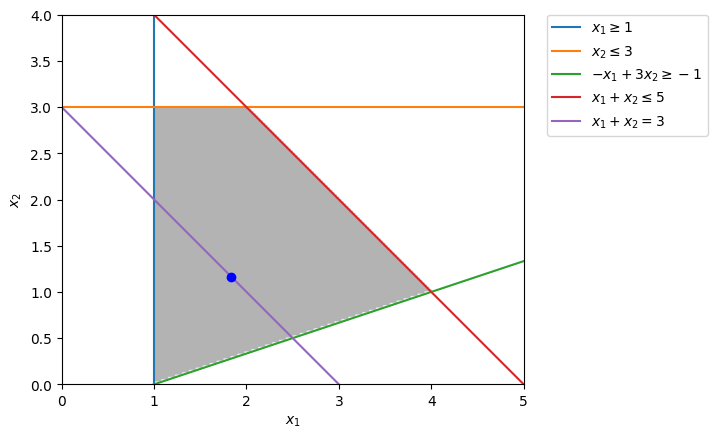

In [ ]:
# plot the feasible region
d = np.linspace(0, 5, 200)
x, y = np.meshgrid(d,d)
plt.imshow( ((x>=1) & (y<=3) & (-x+3*y>=-1) & (x+y<=5)).astype(int) ,
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 5, 200)

# x1 >= 1
x1 = x*0+1
y1 = np.linspace(0, 5, 200)

# x2 <= 3
y2 = x*0+3
# -x1 +3x2 >= -1
y3 = (-1+x)/3
# x1 + x2 <=5
y4 = 5-x
# x1 + x2 = 3
y5 = 3-x

# Make plot
plt.plot(x1, y1, label=r'$x_1 \geq 1$')
plt.plot(x, y2, label=r'$x_2 \leq 3$')
plt.plot(x, y3, label=r'$-x_1 +3x_2 \geq -1$')
plt.plot(x, y4, label=r'$x_1 + x_2 \leq 5$')
plt.plot(x, y5, label=r'$x_1 + x_2 = 3$')
plt.plot(x_opt, y_opt, 'bo')
plt.xlim(0,5)
plt.ylim(0,4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

## **Task 2**
The Chebyshev center is the center of the largest ball that can fit within the P
\begin{equation}
P = \{x: a_i^T x \leq b_i, i = 1,2,...,q\}
\end{equation}
1. Formulate the optimization problem of finding the Chebyshev center
\begin{equation}
B = \{x_c+u: \Vert u \Vert_2 \leq r\}
\end{equation}
where $x_c$ is the center and $u=x-x_c$
2. Solve the optimization problem with constraints
\begin{equation}
\begin{aligned}
A = \begin{bmatrix} -1 & -1 \\ -0.5 & 1 \\ 2 & -1 \end{bmatrix} \quad
b = \begin{bmatrix} 1 \\ 2 \\ 4 \end{bmatrix}
\end{aligned}
\end{equation}

In [ ]:
A = np.array([[-1, -1],[-0.5, 1], [2, -1]])
b = np.array([[1],[2],[4]])

r = cp.Variable(1)
x_c = cp.Variable(2)

obj = cp.Minimize(-r)
prob = cp.Problem(obj,  [(A[i]@x_c + r*cp.norm2(A[i]))<=b[i] for i in range(A.shape[0])])
prob.solve()

print("Projected ball radius: \n r: ", r.value)
print("Center: \n c: ", x_c.value)



Projected ball radius: 
 r:  [1.5289612]
Center: 
 c:  [0.58113883 0.58113883]


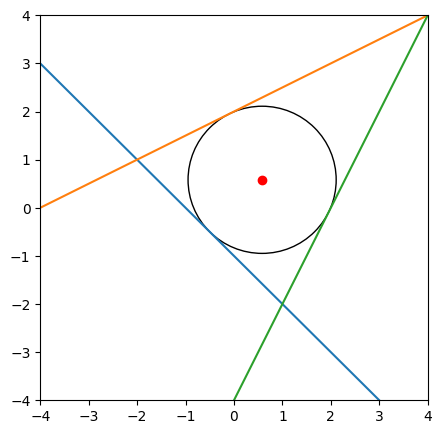

In [ ]:
plt.figure(figsize=(5,5))
ax = plt.gca()
ax.clear()
circle = plt.Circle(x_c.value, r.value, fill=False)
ax.add_patch(circle)
plt.scatter([x_c.value[0]], [x_c.value[1]], color="r")

x = np.linspace(-4, 4, 200)
# -x-y <= 1
y1 = -x-1
# -0.5x+y <= 2
y2 = 2+0.5*x
# 2x-y <= 4
y3 = 2*x-4

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.xlim(-4,4)
plt.ylim(-4,4)

plt.show()